In [14]:
from pymatgen.ext.matproj import MPRester
from pprint import pprint
from pymatgen.core.operations import SymmOp
with MPRester("MSue3C8DVEAaHs0r") as m:
    struc = m.get_structure_by_material_id("mp-9362")


Première symmétrie : Le plan miroir.

Il s'agit de l'opérateur n°8 dans Jmol Crystal Symmetry Explorer.

In [15]:
symm1 = SymmOp.from_xyz_string('-y, -x, z')
print('Matrice de rotation:')
print(symm1.rotation_matrix)

Matrice de rotation:
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


Lorsque nous appliquons cette opération de symmétrie à l'atome de Rubidium situé en [1/3 2/3 2/3], celui-ci se retrouve à une position différente.

In [16]:
print('Coordonnées du Rb après application du plan miroir:')

print(symm1.operate((1/3, 2/3, 2/3)))



Coordonnées du Rb après application du plan miroir:
[-0.66666667 -0.33333333  0.66666667]


On remarque bien que la coordonnée en z ne change pas et que les coordonnées x et y s'inversent tout en changeant de signe. (x devient -y et y devient -x)

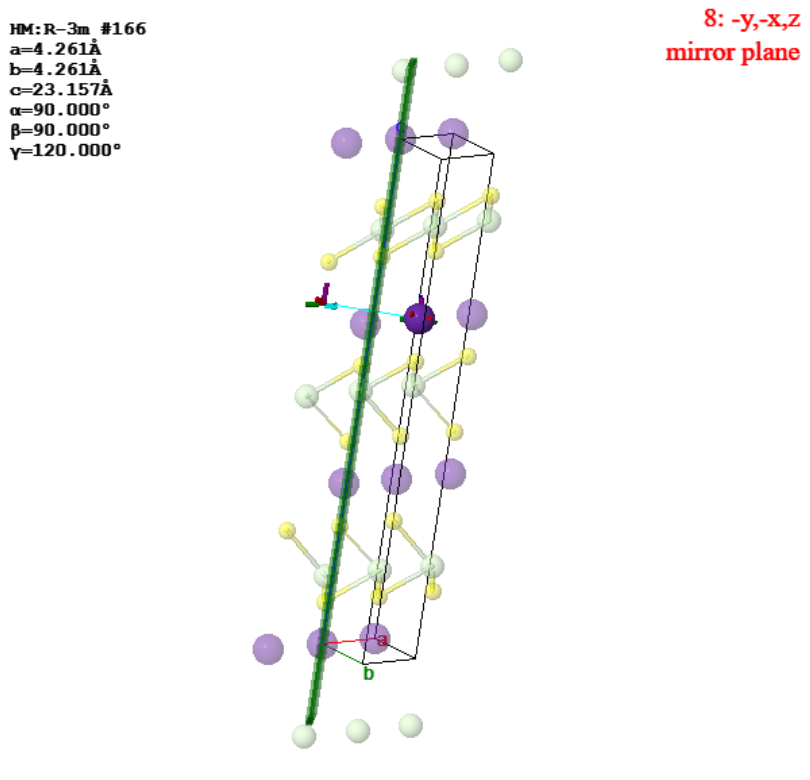

Remarque: Si l'on applique cette symmétrie sur un atome se trouvant sur le plan miroir, celui-ci ne changera pas de position. L'image renvoyée est l'atome lui-même. On peut le constater sur l'atome de Praséodyme situé en [0 0 1/2].

In [17]:
print('Coordonnées du Pr après application du plan miroir:')
print(symm1.operate((0, 0, 1/2)))

Coordonnées du Pr après application du plan miroir:
[0.  0.  0.5]


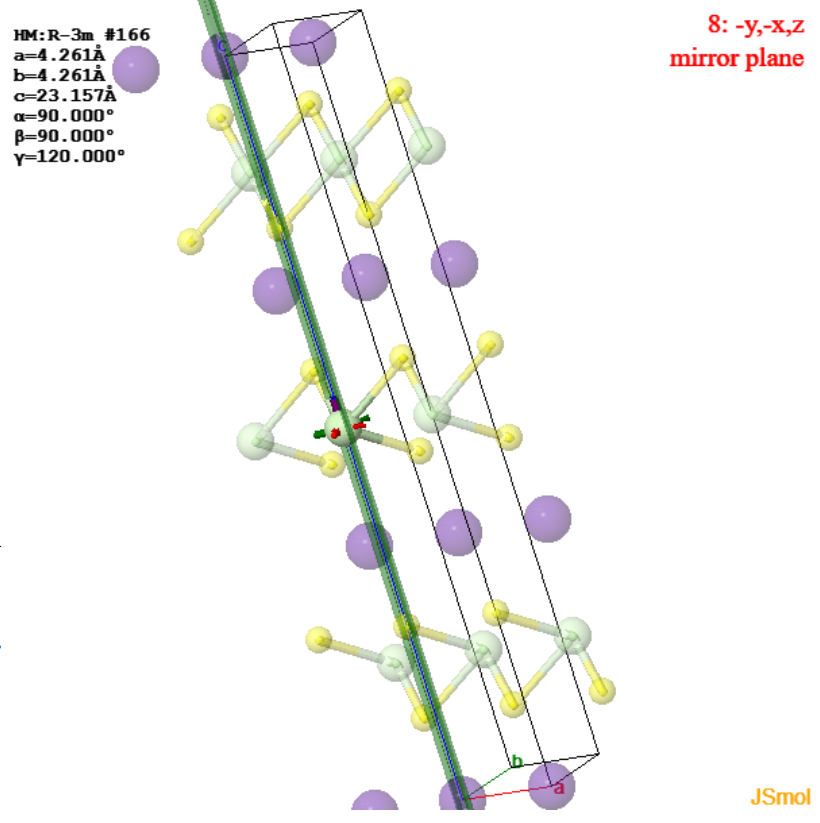

Deuxième symmétrie : Le centre d'inversion.

Il s'agit de l'opérateur n°14 dans Jmol Crystal Symmetry Explorer.

In [18]:
symm2 = SymmOp.from_xyz_string('-x-1/3, -y+1/3, -z+1/3')
print("Matrice d'inversion:")
print(symm2.rotation_matrix)

Matrice de rotation:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]


Cette matrice correspond uniquement à l'inversion en prenant le centre d'inversion comme origine. Lorsque ce centre d'inversion ne se trouve pas en [0 0 0], il faut ajouter une translation. L'équation de transformation devient alors:
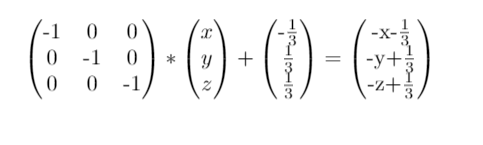

Lorsque nous appliquons cette opération de symmétrie à l'atome de Rubidium situé en [2/3 1/3 1/3], celui-ci se retrouve à une position différente.

In [20]:
print("Coordonnées du Rb après application de l'inversion:")
print(symm2.operate((2/3, 1/3, 1/3)))

Coordonnées du Rb après application de l'inversion:
[-1.  0.  0.]


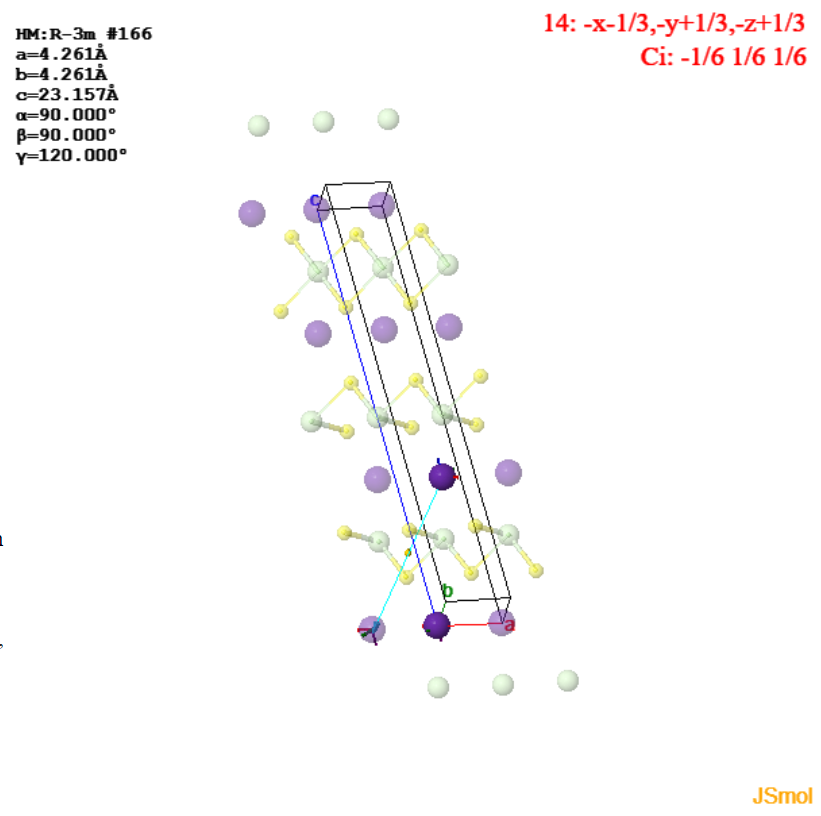

Troisième symmétrie: La roto-inversion.

Il s'agit de l'opérateur n°16 dans Jmol Crystal Symmetry Explorer.

In [21]:
symm3 = SymmOp.from_xyz_string('y-1/3, -x+y+1/3, -z+1/3')
print('Matrice de rotation:')
print(symm3.rotation_matrix)

Matrice de rotation:
[[ 0.  1.  0.]
 [-1.  1.  0.]
 [ 0.  0. -1.]]


Comme précédemment, nous devons ajouter la translation dûe au fait que le centre d'inversion ne se trouve pas en [0 0 0]. Nous obtenons l'équation suivante:
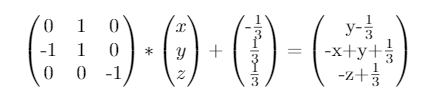

Lorsque nous appliquons cette opération de symmétrie à l'atome de Soufre situé en [2/3 1/3 1/10], celui-ci se retrouve à une position différente.

In [22]:
print("Coordonnées du S après application de la roto-inversion:")
print(symm3.operate((2/3, 1/3, 1/10)))

Coordonnées du Rb après application de la roto-inversion:
[0.         0.         0.23333333]


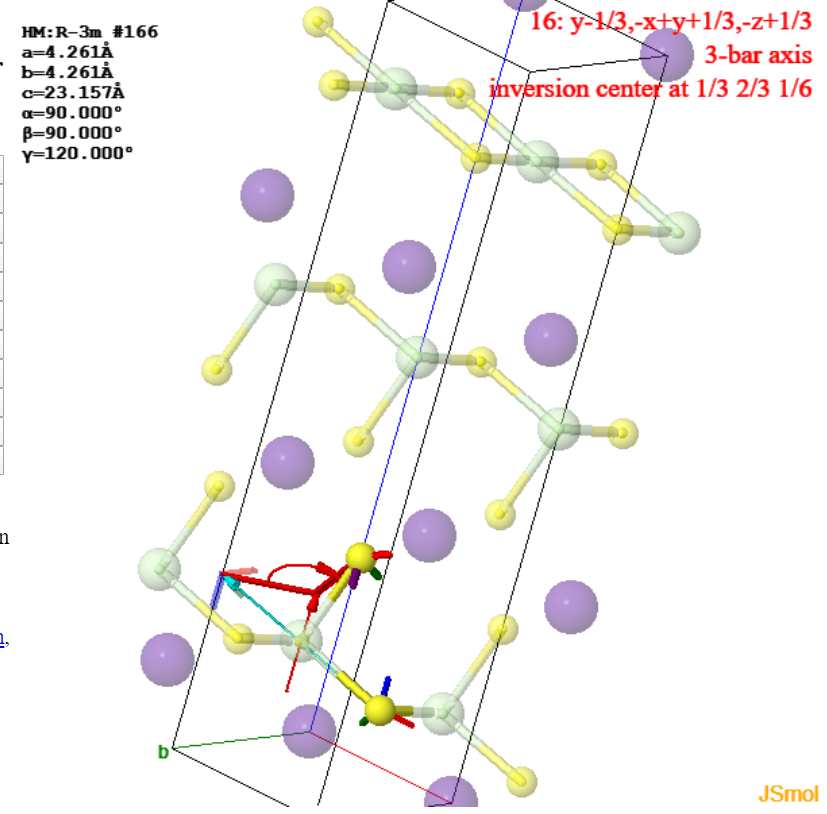

On observe bien une inversion (flèche bleue) suivie d'une rotation d'odre 3.
On peut remarquer que le centre d'inversion se trouve à la position d'un atome de Pr, situé en [1/3, 2/3,1/6]. De ce fait, si l'on applique cette transfomation à cet atome, l'image renvoyée sera l'atome lui-même. (idem que pour le plan miroir, vu précédemment)

In [23]:
print("Coordonnées du Pr après application de la roto-inversion:")
print(symm3.operate((1/3, 2/3, 1/6)))

Coordonnées du Pr après application de la roto-inversion:
[0.33333333 0.66666667 0.16666667]


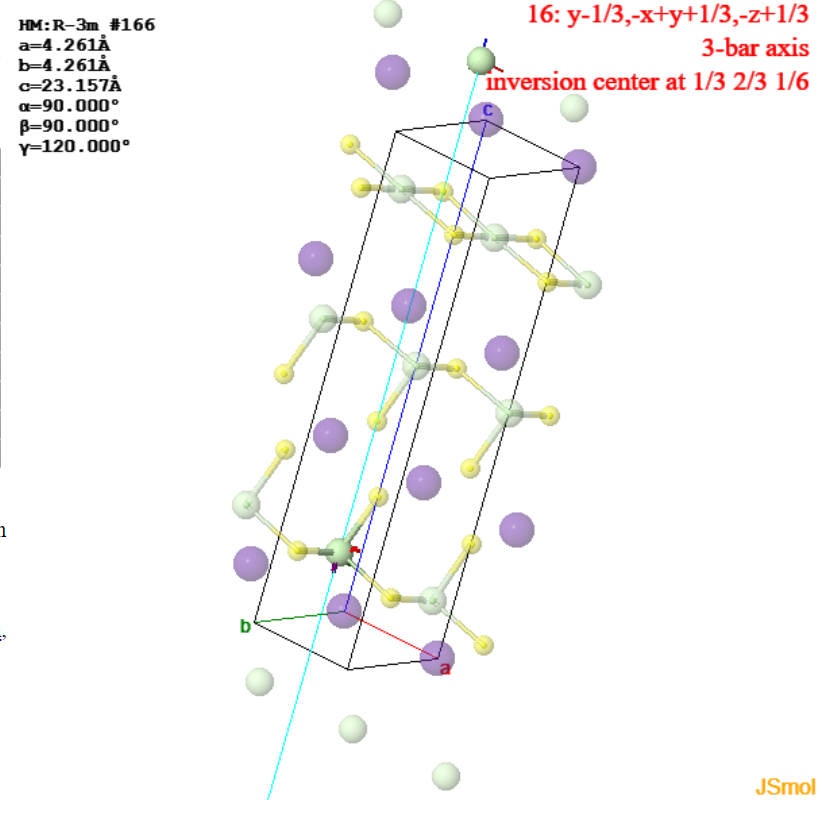